In [239]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer

In [240]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [241]:
df = pd.read_csv("smartphones_preprocessed_v1.csv")
df.head()

,name,link,price,rating,spec_score,processor_brand,processor_core,clock_speed,has_ir,has_nfc,has_5g,ram_gb,rom_gb,brand,battery_capacity_mah,fast_charging_watt,screen_size_inch,foldable_display,resolution_width,resolution_height,display_refresh_rate,ppi,num_rear_cameras,num_front_cameras,rear_primary_mp,front_primary_mp,expandable_memory_supported,expandable_memory_limit
0,Doogee S119,https://www.smartprix.com/mobiles/doogee-s119-...,29999.0,4.40,89,helio,octa,2.00,0,1,0,8.0,512.0,Doogee,10200.0,33.0,6.72,0,1080.0,2400.0,NaN,391.64,NaN,NaN,NaN,NaN,1,NaN
1,Realme Narzo 80x 5G (8GB RAM + 128GB),https://www.smartprix.com/mobiles/realme-narzo...,14499.0,4.05,80,dimensity,octa,2.50,0,0,1,8.0,128.0,Realme,6000.0,45.0,6.72,0,1080.0,2400.0,120.0,391.64,2.0,1.0,50.0,8.0,1,NaN
2,OnePlus 5,https://www.smartprix.com/mobiles/oneplus-5-p1...,22999.0,4.40,74,snapdragon,octa,2.45,0,1,0,8.0,128.0,OnePlus,3300.0,0.0,5.50,0,1080.0,1920.0,NaN,400.53,2.0,1.0,20.0,16.0,0,0.0
3,Samsung Galaxy J2 Pro (2018),https://www.smartprix.com/mobiles/samsung-gala...,7999.0,4.10,49,snapdragon,quad,1.40,0,0,0,1.5,16.0,Samsung,2600.0,0.0,5.00,0,540.0,960.0,NaN,220.29,1.0,1.0,8.0,5.0,1,NaN
4,Xiaomi Redmi Note 10 (6GB RAM + 128GB),https://www.smartprix.com/mobiles/xiaomi-redmi...,14999.0,4.50,78,snapdragon,octa,2.20,1,0,0,6.0,128.0,Xiaomi,5000.0,33.0,6.43,0,1080.0,2400.0,NaN,409.30,4.0,1.0,48.0,13.0,1,512.0


In [242]:
df.isnull().sum()

name                              0
link                              0
price                             0
rating                            0
spec_score                        0
processor_brand                 245
processor_core                   48
clock_speed                     321
has_ir                            0
has_nfc                           0
has_5g                            0
ram_gb                           33
rom_gb                            3
brand                             0
battery_capacity_mah             17
fast_charging_watt               17
screen_size_inch                  0
foldable_display                  0
resolution_width                 11
resolution_height                11
display_refresh_rate           1781
ppi                              11
num_rear_cameras                155
num_front_cameras               167
rear_primary_mp                 158
front_primary_mp                172
expandable_memory_supported       0
expandable_memory_limit     

In [243]:
df.isnull().mean().sort_values(ascending = False)

display_refresh_rate           0.409614
expandable_memory_limit        0.166283
clock_speed                    0.073827
processor_brand                0.056348
front_primary_mp               0.039558
num_front_cameras              0.038408
rear_primary_mp                0.036339
num_rear_cameras               0.035649
processor_core                 0.011040
ram_gb                         0.007590
fast_charging_watt             0.003910
battery_capacity_mah           0.003910
resolution_width               0.002530
resolution_height              0.002530
ppi                            0.002530
rom_gb                         0.000690
brand                          0.000000
link                           0.000000
has_5g                         0.000000
screen_size_inch               0.000000
foldable_display               0.000000
has_nfc                        0.000000
has_ir                         0.000000
spec_score                     0.000000
rating                         0.000000


In [244]:
# Imputing missing display_refresh_rate missing values through the display_refresh_rate values of similar phones (similarity based on brand or/and price)

In [245]:
trf = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = 'ordinal')
df['price_group'] = trf.fit_transform(df[['price']]).astype(int).ravel()

In [246]:
grouped_mode = df.groupby(['brand', 'price_group'])['display_refresh_rate'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
price_group_mode = df.groupby('price_group')['display_refresh_rate'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

def impute_missing_refresh_rate(row):
    val = grouped_mode.get((row['brand'], row['price_group']), np.nan)
    if pd.isna(val):
        return price_group_mode.get(row['price_group'], np.nan)
    return val

missing_refresh_rate_df = df[df['display_refresh_rate'].isnull()]
missing_refresh_rate_df['display_refresh_rate'] = missing_refresh_rate_df.apply(impute_missing_refresh_rate, axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8072\1174465951.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_refresh_rate_df['display_refresh_rate'] = missing_refresh_rate_df.apply(impute_missing_refresh_rate, axis=1)


In [247]:
missing_refresh_rate_df['display_refresh_rate'].isnull().sum()

0

In [248]:
missing_refresh_rate_df.shape

(1781, 29)

In [249]:
df.update(missing_refresh_rate_df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8072\2693732013.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 3 6 ... 0 7 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.update(missing_refresh_rate_df)


In [250]:
df.isnull().mean().sort_values(ascending = False)

expandable_memory_limit        0.166283
clock_speed                    0.073827
processor_brand                0.056348
front_primary_mp               0.039558
num_front_cameras              0.038408
rear_primary_mp                0.036339
num_rear_cameras               0.035649
processor_core                 0.011040
ram_gb                         0.007590
fast_charging_watt             0.003910
battery_capacity_mah           0.003910
resolution_width               0.002530
ppi                            0.002530
resolution_height              0.002530
rom_gb                         0.000690
display_refresh_rate           0.000000
expandable_memory_supported    0.000000
name                           0.000000
foldable_display               0.000000
screen_size_inch               0.000000
link                           0.000000
brand                          0.000000
has_5g                         0.000000
has_nfc                        0.000000
has_ir                         0.000000


In [251]:
for link in df[df['expandable_memory_limit'].isnull()]['link']:
    print(link)

https://www.smartprix.com/mobiles/doogee-s119-ppd1061ooffo
https://www.smartprix.com/mobiles/realme-narzo-80x-5g-8gb-ram-128gb-ppd1nqmx4rvo
https://www.smartprix.com/mobiles/samsung-galaxy-j2-pro-2018-p11017pj0y75
https://www.smartprix.com/mobiles/oukitel-wp32-ppd1h315uv6g
https://www.smartprix.com/mobiles/doogee-v30-pro-ppd1q9hgv2e4
https://www.smartprix.com/mobiles/oppo-reno5-f-ppd1uqzxpa2q
https://www.smartprix.com/mobiles/vivo-y20s-ppd1616ltn9d
https://www.smartprix.com/mobiles/honor-x6s-ppd17kkkkp0g
https://www.smartprix.com/mobiles/samsung-galaxy-j2-2018-p1101394rgz7
https://www.smartprix.com/mobiles/samsung-galaxy-a5-duos-p11011txyao8
https://www.smartprix.com/mobiles/samsung-galaxy-a12s-ppd1vjswa5q1
https://www.smartprix.com/mobiles/oppo-a77s-ppd13831yiwz
https://www.smartprix.com/mobiles/oppo-a5-pro-ppd1klrobrjb
https://www.smartprix.com/mobiles/xiaomi-redmi-note-14s-ppd1bfusw8yo
https://www.smartprix.com/mobiles/doogee-s200-plus-ppd1p3p7a265
https://www.smartprix.com/mobiles/

In [252]:
# Almost all of the above phones (with missing expandable memory limit in the dataset) have expandable memory supported. So, imputing the missing values.
expandable_memory_supported_df = df[df['expandable_memory_supported'] == 1]
grouped_mode = expandable_memory_supported_df.groupby(['brand', 'price_group'])['expandable_memory_limit'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
price_group_mode = expandable_memory_supported_df.groupby('price_group')['expandable_memory_limit'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

def impute_missing_expandable_limit(row):
    val = grouped_mode.get((row['brand'], row['price_group']), np.nan)
    if pd.isna(val):
        return price_group_mode.get(row['price_group'], np.nan)
    return val

missing_expandable_memory_limit_df = df[df['expandable_memory_limit'].isnull()]
missing_expandable_memory_limit_df['expandable_memory_limit'] = missing_expandable_memory_limit_df.apply(impute_missing_expandable_limit, axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8072\2277951932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_expandable_memory_limit_df['expandable_memory_limit'] = missing_expandable_memory_limit_df.apply(impute_missing_expandable_limit, axis=1)


In [253]:
df.update(missing_expandable_memory_limit_df)

In [254]:
df.isnull().mean().sort_values(ascending = False)

clock_speed                    0.073827
processor_brand                0.056348
front_primary_mp               0.039558
num_front_cameras              0.038408
rear_primary_mp                0.036339
num_rear_cameras               0.035649
processor_core                 0.011040
ram_gb                         0.007590
fast_charging_watt             0.003910
battery_capacity_mah           0.003910
resolution_width               0.002530
ppi                            0.002530
resolution_height              0.002530
rom_gb                         0.000690
expandable_memory_supported    0.000000
display_refresh_rate           0.000000
expandable_memory_limit        0.000000
name                           0.000000
foldable_display               0.000000
screen_size_inch               0.000000
link                           0.000000
brand                          0.000000
has_5g                         0.000000
has_nfc                        0.000000
has_ir                         0.000000


In [255]:
df.dropna(subset = ['processor_core', 'ram_gb', 'fast_charging_watt', 'battery_capacity_mah', 'resolution_width', 'ppi', 'resolution_height', 'rom_gb']).shape[0] / df.shape[0]

0.9763109475620975

In [256]:
df.dropna(subset = ['processor_core', 'ram_gb', 'fast_charging_watt', 'battery_capacity_mah', 'resolution_width', 'ppi', 'resolution_height', 'rom_gb'], inplace = True)
df.isnull().mean().sort_values(ascending = False)

clock_speed                    0.066196
processor_brand                0.053475
front_primary_mp               0.037220
num_front_cameras              0.036042
rear_primary_mp                0.034629
num_rear_cameras               0.034158
name                           0.000000
screen_size_inch               0.000000
expandable_memory_limit        0.000000
expandable_memory_supported    0.000000
ppi                            0.000000
display_refresh_rate           0.000000
resolution_height              0.000000
resolution_width               0.000000
foldable_display               0.000000
battery_capacity_mah           0.000000
fast_charging_watt             0.000000
link                           0.000000
brand                          0.000000
rom_gb                         0.000000
ram_gb                         0.000000
has_5g                         0.000000
has_nfc                        0.000000
has_ir                         0.000000
processor_core                 0.000000


In [257]:
missing_processor_brand_df = df[df['processor_brand'].isnull()]
missing_processor_brand_df

,name,link,price,rating,spec_score,processor_brand,processor_core,clock_speed,has_ir,has_nfc,has_5g,ram_gb,rom_gb,brand,battery_capacity_mah,fast_charging_watt,screen_size_inch,foldable_display,resolution_width,resolution_height,display_refresh_rate,ppi,num_rear_cameras,num_front_cameras,rear_primary_mp,front_primary_mp,expandable_memory_supported,expandable_memory_limit,price_group
9,Motorola Moto G Turbo Edition,https://www.smartprix.com/mobiles/motorola-mot...,5990.0,4.20,52,NaN,octa,1.50,0,0,0,2.0,16.0,Motorola,2470.0,0.0,5.00,0,720.0,1280.0,90.0,293.72,1.0,1.0,13.0,5.0,1,32.0,0
13,Tesla Pi Phone,https://www.smartprix.com/mobiles/tesla-pi-pho...,69999.0,4.20,84,NaN,octa,NaN,0,1,1,16.0,512.0,Tesla,5000.0,120.0,6.73,0,1080.0,2448.0,165.0,397.57,3.0,1.0,50.0,32.0,0,0.0,9
22,Samsung Galaxy M52s 5G,https://www.smartprix.com/mobiles/samsung-gala...,24990.0,4.50,74,NaN,octa,NaN,0,0,1,8.0,128.0,Samsung,5000.0,0.0,6.50,0,1080.0,2400.0,120.0,404.89,3.0,1.0,64.0,32.0,1,1024.0,6
30,iKall Z18,https://www.smartprix.com/mobiles/ikall-z18-pp...,6949.0,4.30,61,NaN,quad,1.30,0,0,0,4.0,64.0,iKall,5000.0,0.0,6.82,0,720.0,1560.0,90.0,251.93,1.0,1.0,20.0,13.0,1,64.0,0
37,Hitech Air A7,https://www.smartprix.com/mobiles/hitech-air-a...,4999.0,4.45,43,NaN,quad,1.20,0,0,0,1.0,8.0,Hitech,2000.0,0.0,5.00,0,540.0,960.0,90.0,220.29,1.0,1.0,8.0,2.0,1,32.0,0
44,iKall Z2,https://www.smartprix.com/mobiles/ikall-z2-ppd...,5099.0,4.65,52,NaN,quad,1.30,0,0,0,4.0,32.0,iKall,4000.0,0.0,6.26,0,480.0,1014.0,90.0,179.21,1.0,1.0,8.0,5.0,0,0.0,0
50,iKall K470 Pro,https://www.smartprix.com/mobiles/ikall-k470-p...,5999.0,4.05,59,NaN,octa,1.30,0,0,0,4.0,32.0,iKall,4000.0,0.0,6.26,0,720.0,1520.0,90.0,268.67,1.0,1.0,13.0,8.0,1,128.0,0
60,Spice Coolpad Mi-515,https://www.smartprix.com/mobiles/spice-coolpa...,8449.0,4.35,41,NaN,quad,1.20,0,0,0,1.0,4.0,Spice,2000.0,0.0,5.00,0,540.0,960.0,90.0,220.29,1.0,1.0,5.0,3.0,1,32.0,1
72,Vivo V60 5G,https://www.smartprix.com/mobiles/vivo-v60-5g-...,44990.0,4.65,78,NaN,octa,NaN,0,0,1,8.0,256.0,Vivo,6500.0,100.0,6.82,0,1260.0,2800.0,144.0,450.21,2.0,1.0,50.0,50.0,0,0.0,8
211,Acer Liquid Z630s,https://www.smartprix.com/mobiles/acer-liquid-...,7290.0,4.10,53,NaN,octa,1.30,0,0,0,3.0,32.0,Acer,4000.0,0.0,5.50,0,720.0,1280.0,90.0,267.02,1.0,1.0,8.0,8.0,1,64.0,0


In [258]:
# Now, we will impute missing processor brand values
# The processor brand value does not only depend upon mobile brand and price range, but battery life is crucial too, and chipsets vary in how efficiently they use power.
# So, we will take battery life into account too.

In [259]:
trf = KBinsDiscretizer(n_bins = 4, strategy = 'quantile', encode = 'ordinal')
df['battery_life_group'] = trf.fit_transform(df[['battery_capacity_mah']]).astype(int).ravel()

D:\anaconda_cust\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [261]:
grouped_mode = df.groupby(['brand', 'price_group', 'battery_life_group'])['processor_brand'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
brand_price_group_mode = df.groupby(['brand', 'price_group'])['processor_brand'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
price_group_mode = df.groupby('price_group')['processor_brand'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

def impute_missing_processor_brand(row):
    val1 = grouped_mode.get((row['brand'], row['price_group'], row['battery_life_group']), np.nan)
    if pd.isna(val1):
        val2 = brand_price_group_mode.get((row['brand'], row['price_group']), np.nan)
        if pd.isna(val2):
            return price_group_mode.get(row['price_group'], np.nan)
        return val2
    return val1

missing_processor_brand_df = df[df['processor_brand'].isnull()]
missing_processor_brand_df['processor_brand'] = missing_processor_brand_df.apply(impute_missing_processor_brand, axis = 1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8072\3469982858.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_processor_brand_df['processor_brand'] = missing_processor_brand_df.apply(impute_missing_processor_brand, axis = 1)


In [263]:
df.update(missing_processor_brand_df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8072\3591768773.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 2 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.update(missing_processor_brand_df)


In [264]:
df.isnull().mean().sort_values(ascending = False)

clock_speed                    0.066196
front_primary_mp               0.037220
num_front_cameras              0.036042
rear_primary_mp                0.034629
num_rear_cameras               0.034158
name                           0.000000
screen_size_inch               0.000000
price_group                    0.000000
expandable_memory_limit        0.000000
expandable_memory_supported    0.000000
ppi                            0.000000
display_refresh_rate           0.000000
resolution_height              0.000000
resolution_width               0.000000
foldable_display               0.000000
fast_charging_watt             0.000000
link                           0.000000
battery_capacity_mah           0.000000
brand                          0.000000
rom_gb                         0.000000
ram_gb                         0.000000
has_5g                         0.000000
has_nfc                        0.000000
has_ir                         0.000000
processor_core                 0.000000


In [273]:
df[['clock_speed', 'price', 'ram_gb', 'battery_capacity_mah']].corr()['clock_speed']

clock_speed             1.000000
price                   0.608100
ram_gb                  0.702605
battery_capacity_mah    0.162955
Name: clock_speed, dtype: float64

<Axes: xlabel='ram_gb', ylabel='clock_speed'>

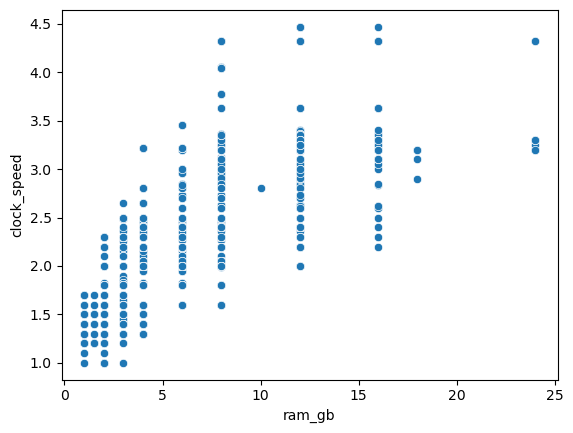

In [272]:
# Clock speed is more correlated to RAM as compared to battery_life and price.
sns.scatterplot(df, x = 'ram_gb', y = 'clock_speed')

In [274]:
# So, we will use smartphone brand and RAM values to imput missing clock_speed values
trf = KBinsDiscretizer(n_bins = 4, strategy = 'quantile', encode = 'ordinal')
df['ram_gb_group'] = trf.fit_transform(df[['ram_gb']]).astype(int).ravel()

In [275]:
trf.bin_edges_

array([array([ 1.,  4.,  6.,  8., 24.])], dtype=object)

In [282]:
grouped_mean = df.groupby(['brand', 'ram_gb_group'])['clock_speed'].agg(lambda x: x.mean())
ram_group_mean = df.groupby('ram_gb_group')['clock_speed'].agg(lambda x: x.mean())

def impute_missing_clock_speed(row):
    val = grouped_mean.get((row['brand'], row['ram_gb_group']), np.nan)
    if pd.isna(val):
        return ram_group_mean.get(row['ram_gb_group'], np.nan)
    return val

missing_clock_speed_df = df[df['clock_speed'].isnull()]
missing_clock_speed_df['clock_speed'] = missing_clock_speed_df.apply(impute_missing_clock_speed, axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8072\1569633763.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_clock_speed_df['clock_speed'] = missing_clock_speed_df.apply(impute_missing_clock_speed, axis=1)


In [285]:
df.update(missing_clock_speed_df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8072\3915810124.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 3 3 ... 0 3 2]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.update(missing_clock_speed_df)


In [286]:
df.shape

(4245, 31)

In [287]:
df.isnull().mean().sort_values(ascending = False)

front_primary_mp               0.037220
num_front_cameras              0.036042
rear_primary_mp                0.034629
num_rear_cameras               0.034158
name                           0.000000
screen_size_inch               0.000000
battery_life_group             0.000000
price_group                    0.000000
expandable_memory_limit        0.000000
expandable_memory_supported    0.000000
ppi                            0.000000
display_refresh_rate           0.000000
resolution_height              0.000000
resolution_width               0.000000
foldable_display               0.000000
fast_charging_watt             0.000000
link                           0.000000
battery_capacity_mah           0.000000
brand                          0.000000
rom_gb                         0.000000
ram_gb                         0.000000
has_5g                         0.000000
has_nfc                        0.000000
has_ir                         0.000000
clock_speed                    0.000000


In [288]:
df.dropna().shape[0] / df.shape[0]

0.9625441696113074

In [294]:
# We can see that even though if we drop all the rows with atleast one missing values, we will only use 4% of our data.
# But, by manually checking some phones, it is found that we can get their camera details from the smartprix website. These details did not just get collected from the web scraping.
# Also, we missed to collect one more important information about the phones which plays a very important role to the price of the phone and that is screen_type like LCD, AMOLED, etc.
# So, in another notebook, I am going to scrape these details from the smartprix website and store them to a csv file and then we will do further missing value imputation in another notebook.

In [295]:
df.to_csv("smartphones_missing_imputation_v1.csv", index = False)